In [3]:
from src.all_in_one import *
from src.basic_variables import *

2025-01-09 02:29:14,360 - INFO - Processed 756 records so far.
2025-01-09 02:29:15,279 - INFO - Processed 342 records so far.


## Initiate Intake Dataset

In [4]:
int_file = path_manager.get_data_file(Category.PS, PSFile.PSNT)
intake = get_df(int_file.path, int_file.sheet)
intake_dataset = Dataset(config_file, int_file.sheet)
filtered_intake = filter_dataframe_on_date(
    intake, intake_dataset.dvars, START, END, FilterType.IN
)

In [ ]:
# intake.head()
filtered_intake

## Filter New Intake

In [5]:
new_nt_s1 = filter_dataframe_on_date(intake, "nt_s1", START, END)
new_intake = filter_dataframe_on_date(intake, "nt_s2", START, END)
new_nt_s3 = filter_dataframe_on_date(intake, "nt_s3", START, END)
new_reintake = filter_dataframe_on_date(intake, "nt_re", START, END)

In [27]:
new_intake.to_clipboard()

In [ ]:
new_reintake

## Intake Number of Sessions

In [6]:
nt_s1 = new_nt_s1.shape[0]
nt_s2 = new_intake.shape[0]
nt_s3 = new_nt_s3.shape[0]
nt_re = new_reintake.shape[0]

In [7]:
nt_s1 + nt_s2 + nt_s3 + nt_re

32

## New Intake Sex and Age Groups

In [8]:
f_new_intake = pd.merge(
    new_intake, rebuilt_scr[["rid", "sex", "age"]], on="rid", how="left"
)
f_new_intake[["rid", "fcid", "sex", "age"]]

,rid,fcid,sex,age
0,R1264,8110080032,Female,49
1,R1260,8110080033,Female,43
2,R1337,8110100023,Male,54
3,R1292,8110100024,Female,40
4,R1250,8110100025,Female,30
5,R1511,8110100026,Female,29
6,R1378,8110100027,Female,32
7,R1232,8110110022,Female,39
8,R1497,8110110024,Male,31
9,R1267,8110020133,Female,32


In [9]:
# f_new_intake['sex'].value_counts(dropna=False, normalize=True)
f_new_intake["sex"].value_counts(dropna=False, normalize=False)

sex
Female    8
Male      5
Name: count, dtype: int64

In [10]:
categorize_and_count_ages(f_new_intake["age"])

age
18-27    0
28-37    6
38-47    4
48-57    2
58-67    1
68-77    0
Name: count, dtype: int64

## Beneficiaries Victimhood

In [11]:
# new_intake['fcid', intake_dataset.bovars]
fcid = ["fcid"]
victimhood_df = new_intake.loc[:, fcid + intake_dataset.bovars]

In [12]:
count_df = new_intake[intake_dataset.bovars].apply(lambda x: x.value_counts()).fillna(0)
count_df = count_df.T.reset_index().rename(
    columns={"index": "victimhood"}
)  # Transposing
count_df["No"] = count_df["No"].astype("Int64")
count_df["Yes"] = count_df["Yes"].astype("Int64")


In [13]:
count_df

,victimhood,No,Yes
0,family_of_missing,3,10
1,survivor_of_detention,7,6
2,primary_torture,7,6
3,secondary_torture,0,13
4,sexual_violation_a,11,2
5,sexual_violation_p,11,2
6,hrd,13,0
7,journalist,13,0
8,wov,1,12
9,stgbv,10,3


In [19]:
from upsetplot import UpSet
from upsetplot import UpSet, from_indicators
import matplotlib.pyplot as plt

In [22]:
victimhood_df.to_clipboard()

In [20]:
# Convert "Yes"/"No" to boolean (True/False)
boolean_victimhood_df = victimhood_df.drop(columns="fcid").map(lambda x: x == "Yes")

/home/fmny/fc-performeter/venv/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/fmny/fc-performeter/venv/lib/python3.12/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

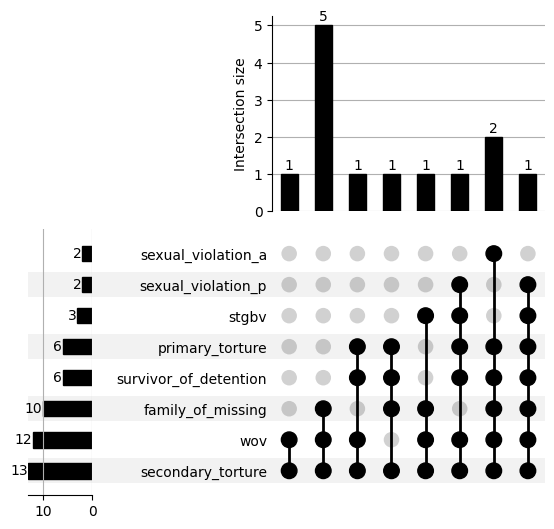

In [21]:
# Create the UpSet plot
upset_data = from_indicators(
    data=boolean_victimhood_df, indicators=boolean_victimhood_df.columns
)
upset = UpSet(upset_data, subset_size="count", show_counts=True)
upset.plot()
plt.show()